In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the e-commerce sales data
# Replace 'ecommerce_data.csv' with the path to your actual dataset
df = pd.read_csv('data.csv')

In [8]:
# Display the first few rows of the dataset
df.head()

# Data cleaning
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 order_id        0
customer_id     0
order_date      0
product_name    0
quantity        0
price           0
dtype: int64


In [9]:
# Fill or drop missing values as necessary
df.dropna(inplace=True)  # For simplicity, dropping rows with missing values

# Converting data types if necessary
# For example, converting 'order_date' to datetime if needed
df['order_date'] = pd.to_datetime(df['order_date'])

# Calculate key metrics
# 1. Total Sales
df['total_sales'] = df['quantity'] * df['price']
total_sales = df['total_sales'].sum()
print("Total Sales:", total_sales)

Total Sales: 580.0


In [10]:
# 2. Best-Selling Products
top_products = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Best-Selling Products:\n", top_products)

Top 10 Best-Selling Products:
 product_name
Product A    8
Product B    5
Product C    5
Product D    2
Product E    1
Product F    1
Name: quantity, dtype: int64


In [11]:
# 3. Customer Purchase Patterns
# Count of orders per customer
customer_orders = df.groupby('customer_id')['order_id'].nunique()
print("Customer Purchase Frequency:\n", customer_orders.describe())

Customer Purchase Frequency:
 count    7.000000
mean     1.428571
std      0.786796
min      1.000000
25%      1.000000
50%      1.000000
75%      1.500000
max      3.000000
Name: order_id, dtype: float64


C:\Users\Veeramanikandan\AppData\Local\Temp\ipykernel_1524\2666604016.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['order_date'].dt.to_period('M')).sum()['total_sales'].plot()


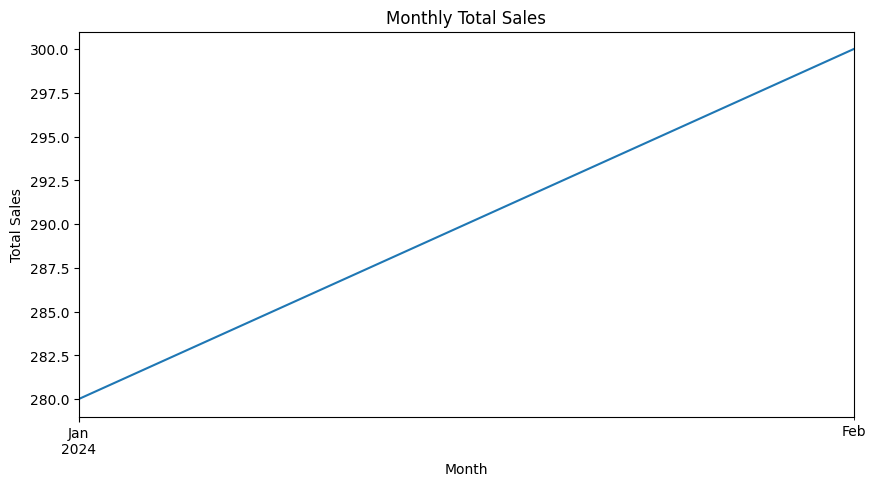

In [12]:
# Visualization

# Plot total sales over time
plt.figure(figsize=(10, 5))
df.groupby(df['order_date'].dt.to_period('M')).sum()['total_sales'].plot()
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

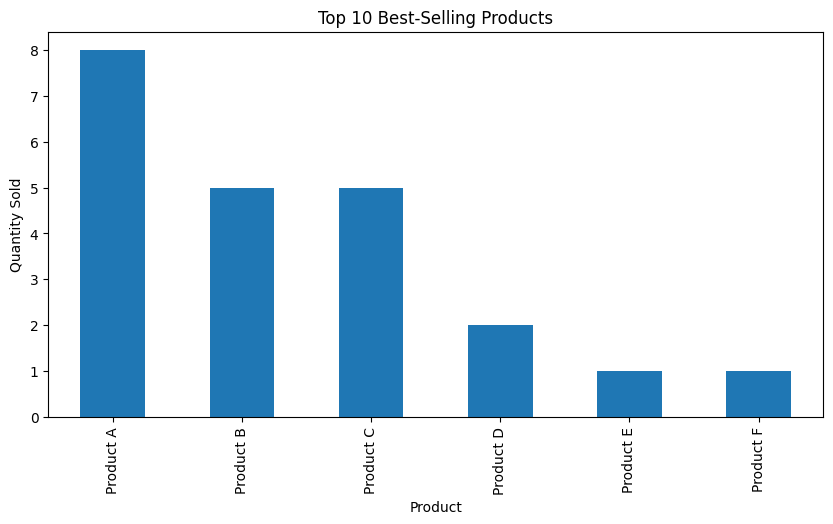

In [13]:
# Top Products Bar Plot
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

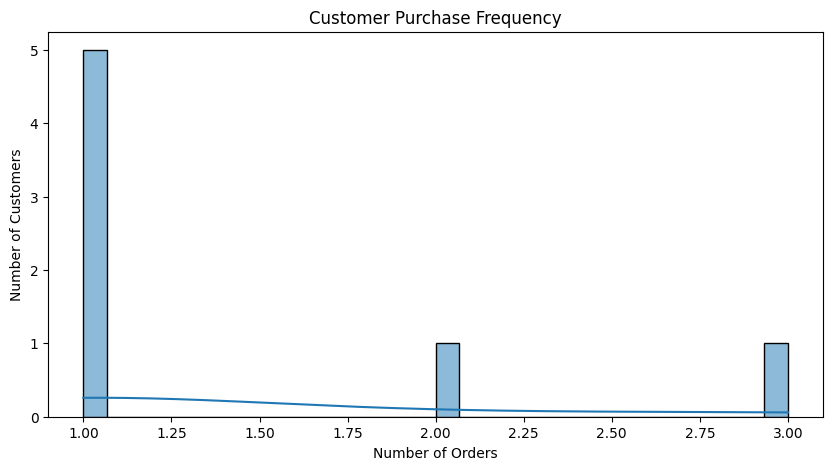

In [14]:
# Purchase Frequency Histogram
plt.figure(figsize=(10, 5))
sns.histplot(customer_orders, bins=30, kde=True)
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()